In [46]:
import pandas as pd
from statistics import median
import numpy as np

In [3]:
chickweight: pd.DataFrame = (
    pd.read_csv('chickweight.csv')
    .rename(str.lower, axis='columns')
)

In [4]:
chickweight

,rownum,weight,time,chick,diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1
...,...,...,...,...,...
573,574,175,14,50,4
574,575,205,16,50,4
575,576,234,18,50,4
576,577,264,20,50,4


**Exercise 1**

In [5]:
(
    chickweight
    .loc[lambda df: df['weight'] > 50]
    .loc[lambda df: df['weight'] < 100]
    .loc[lambda df: df['diet'].isin([1,3])]
    .loc[:, ['weight', 'diet']]
)

,weight,diet
1,51,1
2,59,1
3,64,1
4,76,1
5,93,1
...,...,...
439,78,3
440,89,3
449,55,3
450,66,3


**Exercise 2**

In [6]:
def most_common(series: pd.Series):
    return series.mode().iloc[0]

(
    chickweight
    .groupby(['diet', 'time'])
    .agg(chick_id_max = ('chick', max),
        weight_median = ('weight', median),
        weight_std = ('weight', std),
        weight_mode = ('weight', most_common)
    )
)

chick_id_max  weight_median  weight_std  weight_mode
diet time                                                      
1    0               20           41.0    0.994723           41
     2               20           49.0    4.278157           49
     4               20           56.0    4.128067           56
     6               20           67.0    7.757283           60
     8               20           79.0   13.776198           65
     10              20           93.0   22.542488           93
     12              20          106.0   32.617937          141
     14              20          120.5   37.383763          138
     16              20          149.0   45.037403          162
     18              20          160.0   49.219496          187
     20              20          160.0   55.435840          160
     21              20          166.0   58.702073          157
2    0               30           40.5    1.494434           39
     2               30           48.5    2.875181           48
     4               30           59.0    2.299758           58
     6               30           74.0    4.168666           73
     8               30           90.0   14.802778           87
     10              30          104.5   24.295633          114
     12              30          130.5   37.458273          115
     14              30          141.0   43.697063           71
     16              30          157.0   52.824763           72
     18              30          184.0   63.331667          163
     20              30          198.5   70.252244           76
     21              30          212.5   78.138126           74
3    0               40           41.0    1.032796           41
     2               40           49.5    2.412928           49
     4               40           62.5    2.780887           61
     6               40           77.5    5.704774           68
     8               40           98.0   12.348639           98
     10              40          113.5   20.190482          109
     12              40          141.0   27.072742          103
     14              40          160.0   34.503623          112
     16              40          195.0   44.580015          170
     18              40          229.5   57.587518          146
     20              40          265.0   65.243901          156
     21              40          281.0   71.622545          147
4    0               50           41.0    1.054093           42
     2               50           51.5    1.932184           50
     4               50           64.5    2.549510           62
     6               50           84.0    5.065131           84
     8               50          103.0    9.335714          103
     10              50          123.5   11.430952          117
     12              50          153.0   15.276707          155
     14              50          161.5   15.732486          138
     16              50          179.5   25.302613          145
     18              50          200.5   33.557413          234
     20              50          231.0   37.568086          199
     21              50          237.0   43.347754          196

**Exercise 3**

Find the chickens who died prematurely

<AxesSubplot:>

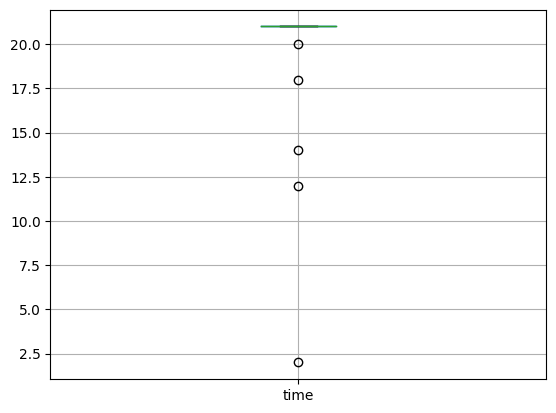

In [39]:
(
    chickweight
    .groupby('chick')[['time']]
    .max()
    .boxplot('time')
)

Find the fattest chickens per diet

In [42]:
(
    chickweight
    .loc[
        chickweight
        .groupby('diet')['weight'] 
        .transform(max) == chickweight['weight'] 
    ]
    .drop('rownum', axis='columns')
    .set_index('diet')
    .loc[:, ['chick', 'weight', 'time']]
)

,chick,weight,time
diet,,,
1,7,305,21
2,21,331,21
3,35,373,21
4,48,322,21


**Exercise 4**

In [62]:
(
    chickweight
    .assign(mean_weight_diet= 
            lambda df:
                df.groupby("diet")['weight']
                .transform(np.mean)
    )
    .assign(mean_weight_diet_time=
            lambda df:
                df.groupby(["diet", "time"])['weight']
                .transform(np.mean)
    )
    .assign(num_chicken_diet=
            lambda df:
                df.groupby(["diet", "chick"])['weight']
                .transform(len)
    )
)

,rownum,weight,time,chick,diet,mean_weight_diet,mean_weight_diet_time,num_chicken_diet
0,1,42,0,1,1,102.645455,41.400000,12
1,2,51,2,1,1,102.645455,47.250000,12
2,3,59,4,1,1,102.645455,56.473684,12
3,4,64,6,1,1,102.645455,66.789474,12
4,5,76,8,1,1,102.645455,79.684211,12
...,...,...,...,...,...,...,...,...
573,574,175,14,50,4,135.262712,161.800000,12
574,575,205,16,50,4,135.262712,182.000000,12
575,576,234,18,50,4,135.262712,202.900000,12
576,577,264,20,50,4,135.262712,233.888889,12


<h3>Pandas exercises<h/3>

In [63]:
import pandas as pd
import numpy as np

**Filter with Lag**

In [145]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df

,A
0,1
1,2
2,2
3,3
4,4
5,5
6,5
7,5
8,6
9,7


In [146]:
(
    df
    .assign(
        equal=
        lambda d: d.diff() == 0
    )
    .loc[
        lambda df:
            df['equal'] == False
    ]
    .drop(columns=['equal'])
)

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**Aggregate Towards Indices**

In [131]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.082764,0.161928,0.144075,0.669283,0.903370,0.880149,0.597017,0.155919,0.726692,0.821165
1,0.538488,0.939554,0.141772,0.978116,0.817194,0.550709,0.481244,0.699734,0.434987,0.964236
2,0.737293,0.458705,0.377729,0.345042,0.611381,0.775568,0.521151,0.041992,0.334055,0.662428
3,0.837069,0.291078,0.851745,0.286218,0.261120,0.925139,0.614740,0.015227,0.418054,0.128421
4,0.130903,0.952656,0.343351,0.106374,0.592669,0.888288,0.059983,0.991368,0.168433,0.765960


Which column of numbers has the smallest sum?

In [132]:
(
    df
    .sum()
    .to_frame()
    .rename(columns={0: 'column_sum'})
    .loc[
        lambda d: d.idxmin()
    ]
)

,column_sum
c,1.858671


Which row of the dataframe has the smallest sum?

In [143]:
(
    df
    .sum(axis='columns')
    .to_frame()
    .rename(columns={0: 'row_sum'})
    .loc[
        lambda d: d.idxmin()
    ]
)

,row_sum
3,4.628813


**Premade Groups**

In [147]:
df = pd.DataFrame(np.random.randint(0, 101, size=(10000, 2)), columns=['A', 'B']) 
df

,A,B
0,35,5
1,99,86
2,98,76
3,62,29
4,67,21
...,...,...
9995,22,90
9996,15,51
9997,59,99
9998,72,19


**Searching for NaN**

In [149]:
df = (
    pd.DataFrame(np.random.randint(0, 101, size=(10000, 100)))
    .mask(np.random.randint(0, 10, size=(10000, 100)) == 1, other=np.nan)
)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,14.0,NaN,18.0,62.0,NaN,93.0,78.0,10.0,40.0,27.0,...,68.0,33.0,85.0,29.0,61.0,21.0,72.0,55.0,6.0,17.0
1,36.0,26.0,78.0,31.0,46.0,83.0,0.0,84.0,40.0,75.0,...,8.0,58.0,78.0,37.0,86.0,63.0,99.0,10.0,43.0,66.0
2,52.0,63.0,16.0,14.0,87.0,42.0,37.0,86.0,75.0,92.0,...,16.0,51.0,30.0,NaN,59.0,28.0,69.0,49.0,50.0,65.0
3,NaN,36.0,25.0,68.0,16.0,18.0,6.0,94.0,52.0,72.0,...,72.0,4.0,43.0,40.0,48.0,90.0,11.0,59.0,28.0,92.0
4,45.0,72.0,24.0,88.0,65.0,98.0,99.0,41.0,NaN,98.0,...,41.0,81.0,59.0,46.0,32.0,66.0,27.0,67.0,77.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.0,71.0,39.0,10.0,28.0,81.0,100.0,2.0,4.0,10.0,...,47.0,33.0,44.0,35.0,58.0,23.0,69.0,63.0,63.0,72.0
9996,17.0,74.0,32.0,87.0,41.0,NaN,76.0,60.0,30.0,55.0,...,86.0,28.0,71.0,62.0,57.0,17.0,30.0,45.0,2.0,93.0
9997,8.0,68.0,28.0,53.0,69.0,21.0,90.0,37.0,NaN,25.0,...,20.0,88.0,100.0,NaN,53.0,43.0,25.0,24.0,89.0,87.0
9998,3.0,77.0,40.0,95.0,50.0,25.0,0.0,93.0,12.0,83.0,...,45.0,35.0,75.0,63.0,93.0,7.0,50.0,93.0,66.0,1.0


In [165]:
(
    df
    .isna()
    .cumsum(axis='columns')
    .apply(
        lambda x: x == 7
    )
    .idxmax(axis='columns')
)

0       66
1       56
2       33
3       88
4       83
        ..
9995    65
9996    71
9997    41
9998    58
9999    66
Length: 10000, dtype: int64

**Counting Zeros**

In [181]:
df = pd.DataFrame({'X': np.random.randint(0, 10, 100)})
df

,X
0,5
1,5
2,0
3,3
4,2
...,...
95,7
96,6
97,1
98,2


In [194]:
(
    df
    .assign(
        iszero=
            lambda x: x == 0
    )
    .assign(
        zero_cumsum=
            lambda x: x['iszero'].cumsum()
    )
    .assign(
        steps_from_zero=
            lambda x: 
                x
                .groupby('zero_cumsum')
                .cumcount()
    )
    .drop(columns=['iszero','zero_cumsum'])
)

,X,steps_from_zero
0,5,0
1,5,1
2,0,0
3,3,1
4,2,2
...,...,...
95,7,13
96,6,14
97,1,15
98,2,16


**Imputing Values in Pandas**

In [204]:
df = pd.DataFrame({
    'group': list('aabbabbbabab'),
    'value': [1, -2, 3, -3, 2, 3, -8, 1, 7, 3, -1, 8]})
df

,group,value
0,a,1
1,a,-2
2,b,3
3,b,-3
4,a,2
5,b,3
6,b,-8
7,b,1
8,a,7
9,b,3


In [205]:
df['value'].loc[df['value'] > 0]

0     1
2     3
4     2
5     3
7     1
8     7
9     3
11    8
Name: value, dtype: int64

In [211]:
def mean_positive_numbers(series: pd.Series):
    return np.mean(series.loc[series > 0])

(
    df
    .assign(
        value_mean_positive = 
        
            lambda x: 
                x.groupby('group')
                .transform(mean_positive_numbers)
    )
    .apply(
        lambda x:
            
    )
)

,group,value,value_mean_positive
0,a,1,3.333333
1,a,-2,3.333333
2,b,3,3.600000
3,b,-3,3.600000
4,a,2,3.333333
5,b,3,3.600000
6,b,-8,3.600000
7,b,1,3.600000
8,a,7,3.333333
9,b,3,3.600000


In [213]:
df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().